Let's import some basic required packages.

In [ ]:
#  Import some data manipulation and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,median_absolute_error,mean_squared_log_error, r2_score
from sklearn.model_selection import GridSearchCV

# Read Datasets

In [ ]:
# Read all the given datasets into separate dataframes
aquifers = pd.read_csv('aquifers_fe.csv')
lakes = pd.read_csv('lakes_fe.csv')
rivers = pd.read_csv('rivers_fe.csv')
springs = pd.read_csv('springs_fe.csv')

# Model

## Aquifers

In [ ]:
aquifers.head()

,Mean_Rainfall,Mean_Temp,Actual_Depth,Actual_Volume,Actual_Hydrometry,Date
0,0.415556,6.6250,-6.08026,-8019.271158,-0.083056,1998-01-04
1,2.054444,6.0750,-6.06452,-7956.571285,-0.104167,1998-01-05
2,0.921111,9.0875,-6.15706,-7715.808854,0.011944,1998-01-06
3,0.878889,12.3250,-6.10774,-7731.378766,-0.008611,1998-01-07
4,0.908889,12.6500,-6.05310,-7812.676449,-0.072222,1998-01-08


In [ ]:
# Normalizing the columns to remove negative values
aquifers['Mean_Rainfall'] = (aquifers['Mean_Rainfall'] - aquifers['Mean_Rainfall'].min()) / (aquifers['Mean_Rainfall'].max() - aquifers['Mean_Rainfall'].min())
aquifers['Mean_Temp'] = (aquifers['Mean_Temp'] - aquifers['Mean_Temp'].min()) / (aquifers['Mean_Temp'].max() - aquifers['Mean_Temp'].min())
aquifers['Actual_Depth'] = (aquifers['Actual_Depth'] - aquifers['Actual_Depth'].min()) / (aquifers['Actual_Depth'].max() - aquifers['Actual_Depth'].min())
aquifers['Actual_Volume'] = (aquifers['Actual_Volume'] - aquifers['Actual_Volume'].min()) / (aquifers['Actual_Volume'].max() - aquifers['Actual_Volume'].min())
aquifers['Actual_Hydrometry'] = (aquifers['Actual_Hydrometry'] - aquifers['Actual_Hydrometry'].min()) / (aquifers['Actual_Hydrometry'].max() - aquifers['Actual_Hydrometry'].min())

In [ ]:
aquifers.head()

,Mean_Rainfall,Mean_Temp,Actual_Depth,Actual_Volume,Actual_Hydrometry,Date
0,0.007267,0.295126,0.984879,0.395764,0.090032,1998-01-04
1,0.035926,0.276216,0.985372,0.401094,0.084072,1998-01-05
2,0.016108,0.379792,0.982474,0.421561,0.116854,1998-01-06
3,0.015369,0.491104,0.984019,0.420238,0.111050,1998-01-07
4,0.015894,0.502278,0.985729,0.413327,0.093091,1998-01-08


In [ ]:
# separating the date and target feature
X = aquifers.drop(['Date','Actual_Depth'],axis=1)
y = aquifers['Actual_Depth']

In [ ]:
#Dividing the dataset into train and test for features as well as labels
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#checking the number of rows in training data
len(X_train)

6523

In [ ]:

#checking the number of rows in training labels
len(y_train)

6523

In [ ]:
#checking the number of rows in testing data
len(X_test)

1631

In [ ]:
#checking the number of rows in testing labels
len(y_test)

1631

### knn

In [ ]:
# create a knn regressor
neigh = KNeighborsRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
    'n_neighbors': [3,5,7,9,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean','manhattan']
}
grid = GridSearchCV(estimator=neigh, param_grid=param_grid, cv=10,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    4.4s finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.002814470511889101
Best Params:  {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.02103068051342738

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.05328383316662198

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.9607730924181563

### Multiple Linear Regression

In [ ]:
# create a linear regressor
lr = LinearRegression()

In [ ]:
# fit the lr on the train data
lr = lr.fit(X_train, y_train)

In [ ]:
# find predictions for test data
y_pred = lr.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.3866462761518888

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.31056503793039225

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-0.361099450434454

R2  is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

### Random Forest

In [ ]:
# create a random forest regressor
rf = RandomForestRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
'bootstrap': [True, False],
 'max_depth': [None,2,10, 20, 50, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,500, 1000]
             }
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 33.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 79.3min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 122.7min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 196.9min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 242.8min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 358.7min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 392.0min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.0021697543201036028
Best Params:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.019655865584285948

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.04842439087861878

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.9668303549718164

### SGRegression

In [ ]:
# create a linear regressor
lr = SGDRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
    
    'loss' : ['squared_loss','huber'],
    'alpha': [0.0001,0.001,0.01,0.1],
     'eta0': [0.01,0.1,1,10,100],
    'tol' : [0.00001,0.0001,0.001,0.01,0.1]    
 }
grid = GridSearchCV(estimator=lr, param_grid=param_grid,cv=5,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   25.9s finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.046387992492621995
Best Params:  {'alpha': 0.1, 'eta0': 0.1, 'loss': 'huber', 'tol': 0.1}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.3227038141370854

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.2877640670063738

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-0.1718414332285927

### Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
    
    'criterion' : ['mse','mae'],
    'max_depth': range(10,20),
     'min_samples_split': range(2,10),
    'min_samples_leaf' : range(1,5)    
 }
grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 640 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 64.8min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 90.8min
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed: 99.5min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.0029725895160034803
Best Params:  {'criterion': 'mae', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.01684240996782499

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.05367391890221074

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.9561599730076912

### XGBoost Regressor

In [ ]:
xgbtree = XGBRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
              'learning_rate': [0.001,0.01,0.1,1],
              'max_depth': range(2,10),
              'subsample':[0.01,0.1,1] ,
              'colsample_bytree': [0.01,0.1,1],
              'n_estimators': [100,200,500,1000]}
grid = GridSearchCV(estimator=xgbtree, param_grid=param_grid, cv=5,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 19.9min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 35.3min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 45.0min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 60.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 74.4min finished


[12:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.016081142855098807
Best Params:  {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 1}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.02528232677151125

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.053061569375817304

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.9585200503118089

### AdaBoost Regressor

In [ ]:
abreg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                              random_state=0)

In [ ]:
# find optimal parameters with grid search
param_grid = { 'loss' : ['linear', 'square', 'exponential'],
              'learning_rate': [0.001,0.01,0.1,1],
              'base_estimator__max_depth': range(2,10),
              'n_estimators': [100,200,500,1000]}
grid = GridSearchCV(estimator=abreg, param_grid=param_grid, cv=5,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 53.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 100.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 108.9min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.014184367982375096
Best Params:  {'base_estimator__max_depth': 9, 'learning_rate': 1, 'loss': 'square', 'n_estimators': 200}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.02192634636241439

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.051313886313701484

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.9641048020090041

### MLP Regressor

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [ ]:
# create a directory to save the model weights
import os
os.mkdir('model_aquifer_save')

In [ ]:
'''Callbacks'''
#file path, it saves the model in the 'model_aquifers_save' folder
#and we are monitoring model with val_root_mean_squared_error
filepath="model_aquifer_save/weights.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_root_mean_squared_error', verbose=1, save_best_only=True, mode='auto')

In [ ]:
import datetime

In [ ]:
# the log directory path is used to write the tensorboard logs
log_dir="logs_aquifer\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

In [ ]:
# Creating a Neural Network Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1))

In [ ]:
import tensorflow.keras.backend as K

In [ ]:

def rmsle(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return K.sqrt(msle(y_true, y_pred)) 

In [ ]:
model.compile(optimizer='Adam',loss=rmsle,metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          callbacks=[checkpoint,tensorboard_callback],
          batch_size=128,epochs=100)


Epoch 1/100
51/51 [==============================] - 5s 77ms/step - loss: 0.2173 - root_mean_squared_error: 0.3251 - val_loss: 0.1129 - val_root_mean_squared_error: 0.1807

Epoch 00001: val_root_mean_squared_error improved from inf to 0.18073, saving model to model_aquifer_save/weights.h5
Epoch 2/100
51/51 [==============================] - 3s 67ms/step - loss: 0.0996 - root_mean_squared_error: 0.1531 - val_loss: 0.1082 - val_root_mean_squared_error: 0.1678

Epoch 00002: val_root_mean_squared_error improved from 0.18073 to 0.16782, saving model to model_aquifer_save/weights.h5
Epoch 3/100
51/51 [==============================] - 3s 68ms/step - loss: 0.0849 - root_mean_squared_error: 0.1313 - val_loss: 0.0783 - val_root_mean_squared_error: 0.1181

Epoch 00003: val_root_mean_squared_error improved from 0.16782 to 0.11809, saving model to model_aquifer_save/weights.h5
Epoch 4/100
51/51 [==============================] - 3s 67ms/step - loss: 0.0758 - root_mean_squared_error: 0.1164 - val_l

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              5000      
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1001      
Total params: 3,009,001
Trainable params: 3,009,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
!tensorboard dev upload --logdir /content/logs_aquifer* \
 --name "Model Aquifer" \
 --description "Training results of using MLP for aquifers data" \
 --one_shot

2021-05-08 20:09:05.331214: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/logs_aquifer\fit\20210508-194724

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn

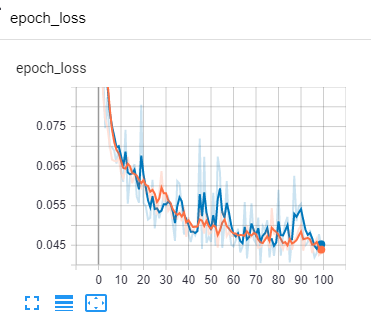

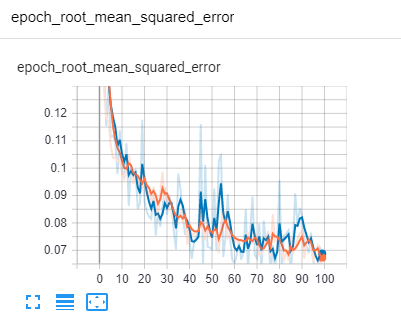

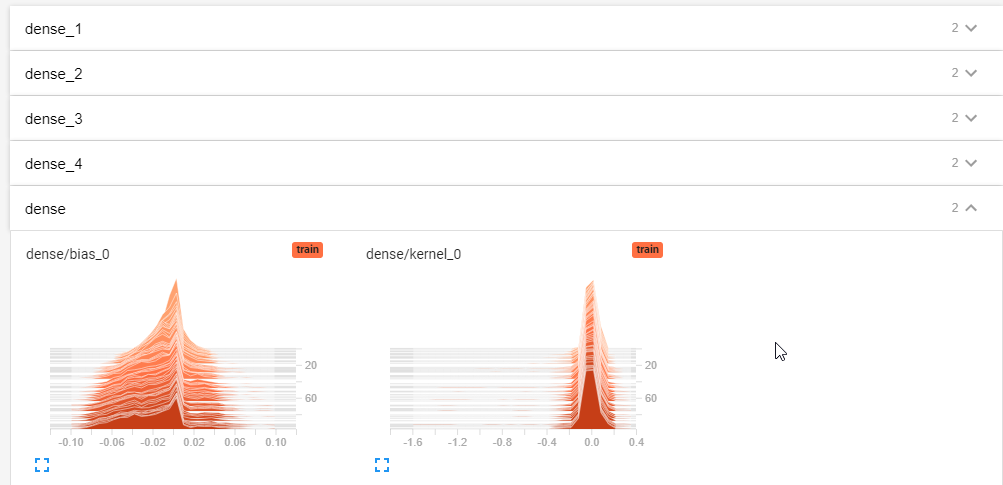

In [ ]:
K.clear_session()

In [ ]:
!zip -r /content/logs_aquifer.zip /content/logs_aquifer\\fit\\20210518-112410

  adding: content/logs_aquifer\fit\20210518-112410/ (stored 0%)
  adding: content/logs_aquifer\fit\20210518-112410/train/ (stored 0%)
  adding: content/logs_aquifer\fit\20210518-112410/train/events.out.tfevents.1621337104.c392faa7ba72.profile-empty (deflated 8%)
  adding: content/logs_aquifer\fit\20210518-112410/train/events.out.tfevents.1621337103.c392faa7ba72.60.92.v2 (deflated 87%)
  adding: content/logs_aquifer\fit\20210518-112410/train/plugins/ (stored 0%)
  adding: content/logs_aquifer\fit\20210518-112410/train/plugins/profile/ (stored 0%)
  adding: content/logs_aquifer\fit\20210518-112410/train/plugins/profile/2021_05_18_11_25_04/ (stored 0%)
  adding: content/logs_aquifer\fit\20210518-112410/train/plugins/profile/2021_05_18_11_25_04/c392faa7ba72.tensorflow_stats.pb (deflated 73%)
  adding: content/logs_aquifer\fit\20210518-112410/train/plugins/profile/2021_05_18_11_25_04/c392faa7ba72.input_pipeline.pb (deflated 57%)
  adding: content/logs_aquifer\fit\20210518-112410/train/plugi

In [ ]:
!zip -r /content/model_aquifer.zip /content/model_aquifer_save/

  adding: content/model_aquifer_save/ (stored 0%)
  adding: content/model_aquifer_save/weights.h5 (deflated 36%)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.020680591275962612

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.0506280141315964

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.9561026133850481

## Lakes

In [ ]:
lakes.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,0,2.857312,14.530141,2.578255,249.606745
1,1,2.857312,14.530141,2.578255,249.606745
2,2,2.857312,14.530141,2.578255,249.606745
3,3,2.857312,14.530141,2.578255,249.606745
4,4,2.857312,14.530141,2.578255,249.606745


In [ ]:
# Normalizing the columns to remove negative values
lakes['Mean_Rainfall'] = (lakes['Mean_Rainfall'] - lakes['Mean_Rainfall'].min()) / (lakes['Mean_Rainfall'].max() - lakes['Mean_Rainfall'].min())
lakes['Mean_Temp'] = (lakes['Mean_Temp'] - lakes['Mean_Temp'].min()) / (lakes['Mean_Temp'].max() - lakes['Mean_Temp'].min())
lakes['Actual_Flow_Rate'] = (lakes['Actual_Flow_Rate'] - lakes['Actual_Flow_Rate'].min()) / (lakes['Actual_Flow_Rate'].max() - lakes['Actual_Flow_Rate'].min())
lakes['Actual_Lake_Level'] = (lakes['Actual_Lake_Level'] - lakes['Actual_Lake_Level'].min()) / (lakes['Actual_Lake_Level'].max() - lakes['Actual_Lake_Level'].min())

In [ ]:
lakes.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,0,0.033568,0.505213,0.028683,0.658369
1,1,0.033568,0.505213,0.028683,0.658369
2,2,0.033568,0.505213,0.028683,0.658369
3,3,0.033568,0.505213,0.028683,0.658369
4,4,0.033568,0.505213,0.028683,0.658369


In [ ]:
# separating the date and target feature
X = lakes.drop(['Date','Actual_Flow_Rate','Actual_Lake_Level'],axis=1)
y = lakes[['Actual_Flow_Rate','Actual_Lake_Level']]

In [ ]:
#Dividing the dataset into train and test for features as well as labels
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#checking the number of rows in training data
len(X_train)

5282

In [ ]:
#checking the number of rows in training labels
len(y_train)

5282

In [ ]:
#checking the number of rows in testing data
len(X_test)

1321

In [ ]:
#checking the number of rows in testing labels
len(y_test)

1321

### knn

In [ ]:
# create a knn regressor
neigh = KNeighborsRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
    'n_neighbors': [3,5,7,9,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean','manhattan']
}
grid = GridSearchCV(estimator=neigh, param_grid=param_grid,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.4s finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.007179035072982888
Best Params:  {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
# normalizing the predicted values
y_pred[:,0] = (y_pred[:,0] - y_pred[:,0].min())/(y_pred[:,0].max() - y_pred[:,0].min())

In [ ]:

# normalizing the predicted values
y_pred[:,1] = (y_pred[:,1] - y_pred[:,1].min())/(y_pred[:,1].max() - y_pred[:,1].min())

In [ ]:
# find median absolute error
median_absolute_error(y_test.iloc[:,0],y_pred[:,0])

0.09425469907988412

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test.iloc[:,0],y_pred[:,0]))

0.1544156745053629

In [ ]:
# find r2 score
r2_score(y_test.iloc[:,0],y_pred[:,0])

-17.851838208697508

In [ ]:
# find median absolute error
median_absolute_error(y_test.iloc[:,1],y_pred[:,1])

0.17039684987454096

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test.iloc[:,1],y_pred[:,1]))

0.17309655804302765

In [ ]:
# find r2 score
r2_score(y_test.iloc[:,1],y_pred[:,1])

-1.2544139727716948

### Multiple Linear Regression

In [ ]:
# create a linear regressor
lr = LinearRegression()

In [ ]:
# fit the lr on train data
lr = lr.fit(X_train, y_train)

In [ ]:
# find the predictions on test data
y_pred = lr.predict(X_test)

In [ ]:
# normalize the predictions
y_pred[:,0] = (y_pred[:,0] - y_pred[:,0].min())/(y_pred[:,0].max() - y_pred[:,0].min())

In [ ]:
# normalize the predictions
y_pred[:,1] = (y_pred[:,1] - y_pred[:,1].min())/(y_pred[:,1].max() - y_pred[:,1].min())

In [ ]:
# find median absolute error
median_absolute_error(y_test.iloc[:,0],y_pred[:,0])

0.501537514471031

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test.iloc[:,0],y_pred[:,0]))

0.4073832306770017

In [ ]:
# find r2 score
r2_score(y_test.iloc[:,0],y_pred[:,0])

-156.95424008399547

In [ ]:
# find median absolute error
median_absolute_error(y_test.iloc[:,1],y_pred[:,1])

0.16368554371553778

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test.iloc[:,1],y_pred[:,1]))

0.14938090265660808

In [ ]:
# find r2 score
r2_score(y_test.iloc[:,1],y_pred[:,1])

-0.8211047468624717

R2  is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

### Random Forest

In [ ]:
# create a random forest regressor
rf = RandomForestRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
'bootstrap': [True, False],
 'max_depth': [None,10, 20, 50, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,500, 1000]
             }
grid = GridSearchCV(estimator=rf, param_grid=param_grid,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 34.7min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 50.6min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 73.4min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 101.1min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 116.7min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.00704013646129713
Best Params:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
# normalize the predictions
y_pred[:,0] = (y_pred[:,0] - y_pred[:,0].min())/(y_pred[:,0].max() - y_pred[:,0].min())

In [ ]:
# normalize the predictions
y_pred[:,1] = (y_pred[:,1] - y_pred[:,1].min())/(y_pred[:,1].max() - y_pred[:,1].min())

In [ ]:
# find median absolute error
median_absolute_error(y_test.iloc[:,0],y_pred[:,0])

0.13486025796631473

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test.iloc[:,0],y_pred[:,0]))

0.18098893002166355

In [ ]:
# find r2 score
r2_score(y_test.iloc[:,0],y_pred[:,0])

-25.890108945315262

In [ ]:
# find median absolute error
median_absolute_error(y_test.iloc[:,1],y_pred[:,1])

0.13719308429587834

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test.iloc[:,1],y_pred[:,1]))

0.1461849494815439

In [ ]:
# find r2 score
r2_score(y_test.iloc[:,1],y_pred[:,1])

-0.6840530272584708

### SGRegression

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
# create a linear regressor
lr = MultiOutputRegressor(SGDRegressor())

In [ ]:
# find optimal parameters with grid search
param_grid = {
    
    'estimator__loss' : ['squared_loss','huber'],
    'estimator__alpha': [0.0001,0.001,0.01,0.1],
     'estimator__eta0': [0.01,0.1,1,10,100],
    'estimator__tol' : [0.00001,0.0001,0.001,0.01,0.1]    
 }
grid = GridSearchCV(estimator=lr, param_grid=param_grid,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.9min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.05084951932788405
Best Params:  {'estimator__alpha': 0.01, 'estimator__eta0': 0.1, 'estimator__loss': 'huber', 'estimator__tol': 1e-05}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.10922191304156625

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.1197168823110551

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-0.7813596866958866

### Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
    
    'criterion' : ['mse','mae'],
    'max_depth': range(10,20),
     'min_samples_split': range(2,10),
    'min_samples_leaf' : range(1,5)    
 }
grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 640 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1402 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 3262 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 3612 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4062 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4612 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 5262 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 6012 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed: 19.7min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.00773425390770469
Best Params:  {'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 9}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.051486780984233205

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.08403082471073176

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-0.091339400115092

### XGBoost Regressor

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
xgbtree = MultiOutputRegressor(XGBRegressor())

In [ ]:
# find optimal parameters with grid search
param_grid = {
              'estimator__learning_rate': [0.001,0.01,0.1,1],
              'estimator__max_depth': range(2,10),
              'estimator__subsample':[0.01,0.1,1] ,
              'estimator__colsample_bytree': [0.01,0.1,1],
              'estimator__n_estimators': [100,200,500,1000]}
grid = GridSearchCV(estimator=xgbtree, param_grid=param_grid, cv=5,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 28.8min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 38.1min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 50.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 82.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 99.7min finished


[20:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:25:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.05736183594793019
Best Params:  {'estimator__colsample_bytree': 0.01, 'estimator__learning_rate': 0.01, 'estimator__max_depth': 8, 'estimator__n_estimators': 1000, 'estimator__subsample': 0.01}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.073711019955124

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.0992570475717765

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-0.3250485495553004

### AdaBoost Regressor

In [ ]:
abreg = MultiOutputRegressor(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                              random_state=0))

In [ ]:
# find optimal parameters with grid search
param_grid = { 'estimator__loss' : ['linear', 'square', 'exponential'],
              'estimator__learning_rate': [0.001,0.01,0.1,1],
              'estimator__base_estimator__max_depth': range(2,10),
              'estimator__n_estimators': [100,200,500,1000]}
grid = GridSearchCV(estimator=abreg, param_grid=param_grid, cv=5,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 48.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 80.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 84.8min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.05696000343719722
Best Params:  {'estimator__base_estimator__max_depth': 9, 'estimator__learning_rate': 0.001, 'estimator__loss': 'exponential', 'estimator__n_estimators': 100}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.049232930801555316

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.08178335355032659

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-0.053764952172182356

### MLP Regressor

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [ ]:
# create a directory to save the model weights
import os
os.mkdir('model_lakes_save')

In [ ]:
'''Callbacks'''
#file path, it saves the model in the 'model_lakes_save' folder
#and we are monitoring model with val_root_mean_squared_error
filepath="model_lakes_save/weights.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_root_mean_squared_error', verbose=1, save_best_only=True, mode='auto')

In [ ]:
import datetime

In [ ]:
# the log directory path is used to write the tensorboard logs
log_dir="logs_lakes\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

In [ ]:
# Creating a Neural Network Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(2))

In [ ]:
import tensorflow.keras.backend as K

In [ ]:

def rmsle(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return K.sqrt(msle(y_true, y_pred)) 

In [ ]:
model.compile(optimizer='Adam',loss=rmsle,metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          callbacks=[checkpoint,tensorboard_callback],
          batch_size=64,epochs=100)


Epoch 1/100
83/83 [==============================] - 3s 28ms/step - loss: 0.1545 - root_mean_squared_error: 0.2561 - val_loss: 0.0808 - val_root_mean_squared_error: 0.1353

Epoch 00001: val_root_mean_squared_error improved from inf to 0.13534, saving model to model_lakes_save/weights.h5
Epoch 2/100
83/83 [==============================] - 2s 25ms/step - loss: 0.0859 - root_mean_squared_error: 0.1395 - val_loss: 0.0806 - val_root_mean_squared_error: 0.1311

Epoch 00002: val_root_mean_squared_error improved from 0.13534 to 0.13111, saving model to model_lakes_save/weights.h5
Epoch 3/100
83/83 [==============================] - 2s 25ms/step - loss: 0.0882 - root_mean_squared_error: 0.1394 - val_loss: 0.0791 - val_root_mean_squared_error: 0.1243

Epoch 00003: val_root_mean_squared_error improved from 0.13111 to 0.12425, saving model to model_lakes_save/weights.h5
Epoch 4/100
83/83 [==============================] - 2s 24ms/step - loss: 0.0864 - root_mean_squared_error: 0.1330 - val_loss: 0

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3072      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 2

In [ ]:
!tensorboard dev upload --logdir /content/logs_lakes* \
 --name "Model Lakes" \
 --description "Training results of using MLP for lakes data" \
 --one_shot

2021-05-08 20:42:27.380193: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/DxtD800iQte9H9Xo1D4Low/

[2021-05-08T20:42:29] Started scanning logdir.
[2021-05-08T20:42:33] Total uploaded: 400 scalars, 1203 tensors (1.8 MB), 1 binary objects (61.0 kB)
[2021-05-08T20:42:33] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/DxtD800iQte9H9Xo1D4Low/


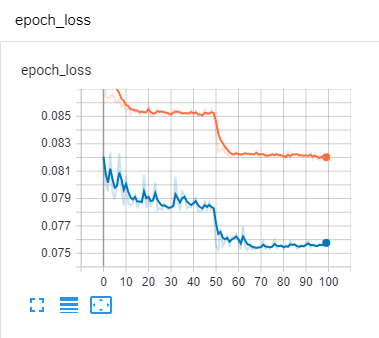

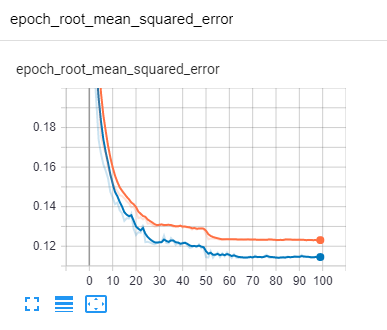

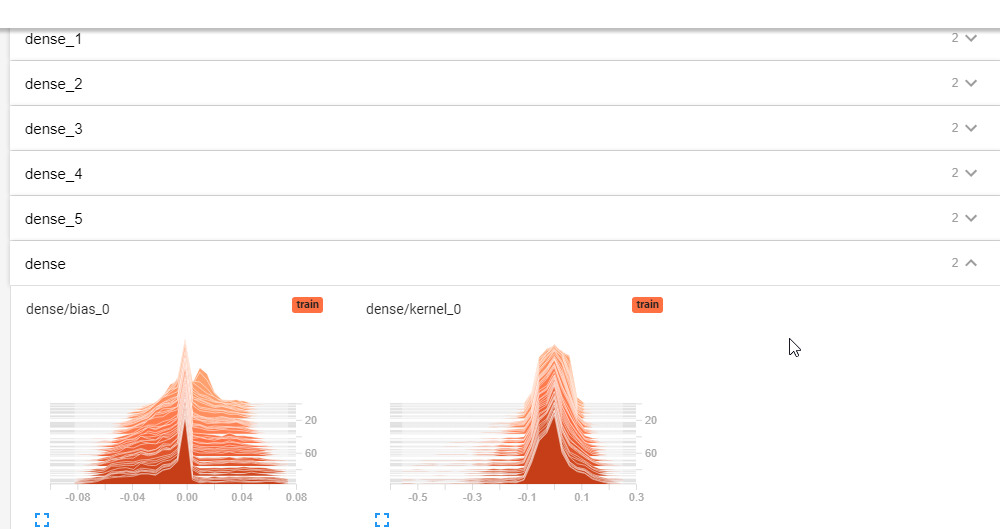

In [ ]:
K.clear_session()

In [ ]:
!zip -r /content/logs_lakes.zip /content/logs_lakes\\fit\\20210518-113958

  adding: content/logs_lakes\fit\20210518-113958/ (stored 0%)
  adding: content/logs_lakes\fit\20210518-113958/train/ (stored 0%)
  adding: content/logs_lakes\fit\20210518-113958/train/events.out.tfevents.1621338008.c392faa7ba72.60.27383.v2 (deflated 88%)
  adding: content/logs_lakes\fit\20210518-113958/train/plugins/ (stored 0%)
  adding: content/logs_lakes\fit\20210518-113958/train/plugins/profile/ (stored 0%)
  adding: content/logs_lakes\fit\20210518-113958/train/plugins/profile/2021_05_18_11_40_08/ (stored 0%)
  adding: content/logs_lakes\fit\20210518-113958/train/plugins/profile/2021_05_18_11_40_08/c392faa7ba72.tensorflow_stats.pb (deflated 73%)
  adding: content/logs_lakes\fit\20210518-113958/train/plugins/profile/2021_05_18_11_40_08/c392faa7ba72.input_pipeline.pb (deflated 57%)
  adding: content/logs_lakes\fit\20210518-113958/train/plugins/profile/2021_05_18_11_40_08/c392faa7ba72.memory_profile.json.gz (stored 0%)
  adding: content/logs_lakes\fit\20210518-113958/train/plugins/pr

In [ ]:
!zip -r /content/model_lakes.zip /content/model_lakes_save/

  adding: content/model_lakes_save/ (stored 0%)
  adding: content/model_lakes_save/weights.h5 (deflated 42%)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(1321, 2)

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.05828410669840223

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.07620093371579216

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.0782713518606033

## Rivers

In [ ]:
rivers.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Hydrometry
0,0,2.789049,16.605386,1.602951
1,1,2.789049,16.605386,1.602951
2,2,2.789049,16.605386,1.602951
3,3,2.789049,16.605386,1.602951
4,4,2.789049,16.605386,1.602951


In [ ]:
# Normalizing the columns to remove negative values
rivers['Mean_Rainfall'] = (rivers['Mean_Rainfall'] - rivers['Mean_Rainfall'].min()) / (rivers['Mean_Rainfall'].max() - rivers['Mean_Rainfall'].min())
rivers['Mean_Temp'] = (rivers['Mean_Temp'] - rivers['Mean_Temp'].min()) / (rivers['Mean_Temp'].max() - rivers['Mean_Temp'].min())
rivers['Actual_Hydrometry'] = (rivers['Actual_Hydrometry'] - rivers['Actual_Hydrometry'].min()) / (rivers['Actual_Hydrometry'].max() - rivers['Actual_Hydrometry'].min())

In [ ]:
rivers.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Hydrometry
0,0,0.060726,0.513441,0.260642
1,1,0.060726,0.513441,0.260642
2,2,0.060726,0.513441,0.260642
3,3,0.060726,0.513441,0.260642
4,4,0.060726,0.513441,0.260642


In [ ]:
# separating the date and target feature
X = rivers.drop(['Date','Actual_Hydrometry'],axis=1)
y = rivers['Actual_Hydrometry']

In [ ]:
#Dividing the dataset into train and test for features as well as labels
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#checking the number of rows in training data
len(X_train)

6573

In [ ]:
#checking the number of rows in training labels
len(y_train)

6573

In [ ]:
#checking the number of rows in testing data
len(X_test)

1644

In [ ]:
#checking the number of rows in testing labels
len(y_test)

1644

### knn

In [ ]:
# create a knn regressor
neigh = KNeighborsRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
    'n_neighbors': [3,5,7,9,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean','manhattan']
}
grid = GridSearchCV(estimator=neigh, param_grid=param_grid,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.4s finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.0044851233000360305
Best Params:  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.19263752732751896

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.17240672420706607

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-5.8396798010532445

### Multiple Linear Regression

In [ ]:
# create a linear regressor
lr = LinearRegression()

In [ ]:
# fit the lr on the train data
lr = lr.fit(X_train, y_train)

In [ ]:
# find the predictions
y_pred = lr.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.24759377527466367

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.22360558658178734

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-11.11193176765791

### Random Forest

In [ ]:
# create a random forest regressor
rf = RandomForestRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
'bootstrap': [True, False],
 'max_depth': [None,10, 20, 50, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,500, 1000]
             }
grid = GridSearchCV(estimator=rf, param_grid=param_grid,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 47.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 67.6min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 99.5min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 140.0min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 163.1min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.004418392261406096
Best Params:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.2872661248004256

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.2101381173298768

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-9.331726982797875

### SGRegression

In [ ]:
# create a linear regressor
lr = SGDRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
    
    'loss' : ['squared_loss','huber'],
    'alpha': [0.0001,0.001,0.01,0.1],
     'eta0': [0.01,0.1,1,10,100],
    'tol' : [0.00001,0.0001,0.001,0.01,0.1]    
 }
grid = GridSearchCV(estimator=lr, param_grid=param_grid,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 993 out of 1000 | elapsed:  1.2min remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.2min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.03498248029913827
Best Params:  {'alpha': 0.0001, 'eta0': 0.1, 'loss': 'huber', 'tol': 0.0001}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.2495866468774621

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.22439254733400352

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-11.210905755555

### Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
    
    'criterion' : ['mse','mae'],
    'max_depth': range(10,20),
     'min_samples_split': range(2,10),
    'min_samples_leaf' : range(1,5)    
 }
grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 640 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1428 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 3274 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3624 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4074 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4624 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 5274 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 6024 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed: 17.9min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.004849844933950395
Best Params:  {'criterion': 'mae', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 3}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.2253926773961617

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.18948102078744866

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-7.012110738801695

### XGBoost Regressor

In [ ]:
xgbtree = XGBRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
              'learning_rate': [0.001,0.01,0.1,1],
              'max_depth': range(2,10),
              'subsample':[0.01,0.1,1] ,
              'colsample_bytree': [0.01,0.1,1],
              'n_estimators': [100,200,500,1000]}
grid = GridSearchCV(estimator=xgbtree, param_grid=param_grid, cv=5,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 26.0min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 34.2min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 56.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 67.7min finished


[23:15:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.035118770493724506
Best Params:  {'colsample_bytree': 0.01, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.01}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.3016761875249506

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.2271985574871166

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-11.698907152170941

### AdaBoost Regressor

In [ ]:
abreg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                              random_state=0)

In [ ]:
# find optimal parameters with grid search
param_grid = { 'loss' : ['linear', 'square', 'exponential'],
              'learning_rate': [0.001,0.01,0.1,1],
              'base_estimator__max_depth': range(2,10),
              'n_estimators': [100,200,500,1000]}
grid = GridSearchCV(estimator=abreg, param_grid=param_grid, cv=5,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 58.1min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 61.6min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.0347410677510596
Best Params:  {'base_estimator__max_depth': 9, 'learning_rate': 0.001, 'loss': 'linear', 'n_estimators': 100}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.19729867696620906

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.1536971298773078

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-4.110286046096933

### MLP Regressor

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [ ]:
# create a directory to save the model weights
import os
os.mkdir('model_rivers_save')

In [ ]:
'''Callbacks'''
#file path, it saves the model in the 'model_rivers_save' folder
#and we are monitoring model with val_root_mean_squared_error
filepath="model_rivers_save/weights.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_root_mean_squared_error', verbose=1, save_best_only=True, mode='auto')

In [ ]:
import datetime

In [ ]:
# the log directory path is used to write the tensorboard logs
log_dir="logs_rivers\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

In [ ]:
# Creating a Neural Network Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(1200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1200,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
import tensorflow.keras.backend as K

In [ ]:

def rmsle(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return K.sqrt(msle(y_true, y_pred)) 

In [ ]:
model.compile(optimizer='Adam',loss=rmsle,metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          callbacks=[checkpoint,tensorboard_callback],
          batch_size=64,epochs=100)


Epoch 1/100
103/103 [==============================] - 4s 31ms/step - loss: 0.0975 - root_mean_squared_error: 0.1290 - val_loss: 0.0656 - val_root_mean_squared_error: 0.0861

Epoch 00001: val_root_mean_squared_error improved from inf to 0.08606, saving model to model_rivers_save/weights.h5
Epoch 2/100
103/103 [==============================] - 3s 29ms/step - loss: 0.0690 - root_mean_squared_error: 0.0907 - val_loss: 0.0654 - val_root_mean_squared_error: 0.0859

Epoch 00002: val_root_mean_squared_error improved from 0.08606 to 0.08590, saving model to model_rivers_save/weights.h5
Epoch 3/100
103/103 [==============================] - 3s 28ms/step - loss: 0.0674 - root_mean_squared_error: 0.0877 - val_loss: 0.0671 - val_root_mean_squared_error: 0.0871

Epoch 00003: val_root_mean_squared_error did not improve from 0.08590
Epoch 4/100
103/103 [==============================] - 3s 28ms/step - loss: 0.0680 - root_mean_squared_error: 0.0887 - val_loss: 0.0658 - val_root_mean_squared_error: 0.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1200)              3600      
_________________________________________________________________
dropout (Dropout)            (None, 1200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1200)              1441200   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               153728    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

In [ ]:
!tensorboard dev upload --logdir /content/logs_rivers* \
 --name "Model Rivers" \
 --description "Training results of using MLP for rivers data" \
 --one_shot

2021-05-08 20:59:24.370122: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/3OUj6QneTKqzIOcGsJbPsA/

[2021-05-08T20:59:26] Started scanning logdir.
[2021-05-08T20:59:30] Total uploaded: 400 scalars, 1203 tensors (1.8 MB), 1 binary objects (71.6 kB)
[2021-05-08T20:59:30] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/3OUj6QneTKqzIOcGsJbPsA/


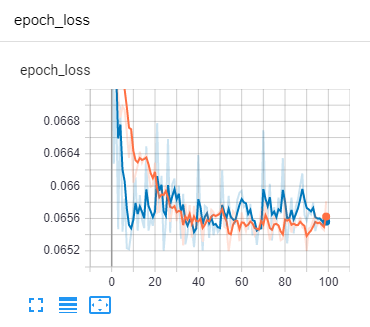

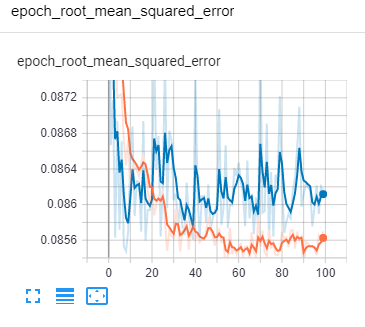

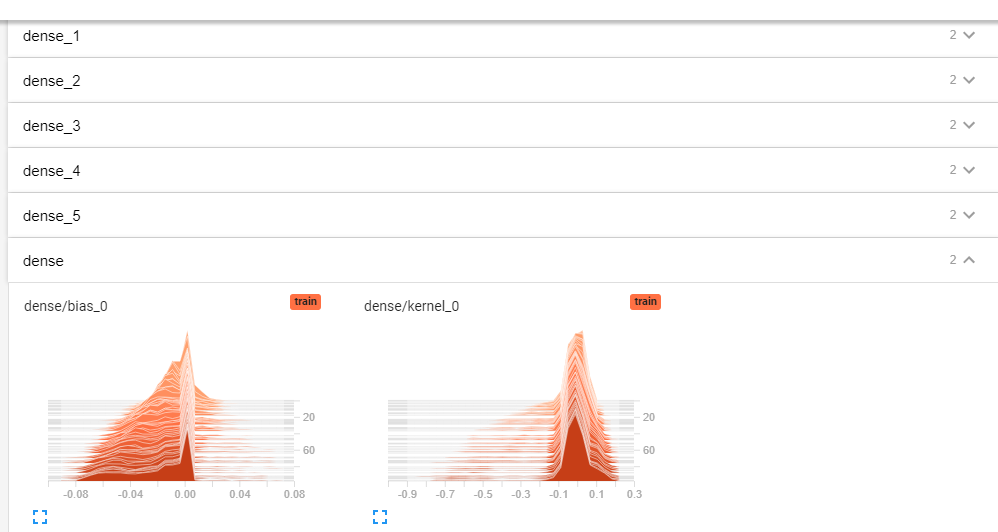

In [ ]:
K.clear_session()

In [ ]:
!zip -r /content/logs_rivers.zip /content/logs_rivers\\fit\\20210518-114803

  adding: content/logs_rivers\fit\20210518-114803/ (stored 0%)
  adding: content/logs_rivers\fit\20210518-114803/train/ (stored 0%)
  adding: content/logs_rivers\fit\20210518-114803/train/events.out.tfevents.1621338490.c392faa7ba72.60.64059.v2 (deflated 88%)
  adding: content/logs_rivers\fit\20210518-114803/train/plugins/ (stored 0%)
  adding: content/logs_rivers\fit\20210518-114803/train/plugins/profile/ (stored 0%)
  adding: content/logs_rivers\fit\20210518-114803/train/plugins/profile/2021_05_18_11_48_11/ (stored 0%)
  adding: content/logs_rivers\fit\20210518-114803/train/plugins/profile/2021_05_18_11_48_11/c392faa7ba72.tensorflow_stats.pb (deflated 73%)
  adding: content/logs_rivers\fit\20210518-114803/train/plugins/profile/2021_05_18_11_48_11/c392faa7ba72.input_pipeline.pb (deflated 57%)
  adding: content/logs_rivers\fit\20210518-114803/train/plugins/profile/2021_05_18_11_48_11/c392faa7ba72.memory_profile.json.gz (stored 0%)
  adding: content/logs_rivers\fit\20210518-114803/train/

In [ ]:
!zip -r /content/model_rivers.zip /content/model_rivers_save/

  adding: content/model_rivers_save/ (stored 0%)
  adding: content/model_rivers_save/weights.h5 (deflated 42%)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(1644, 1)

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.034548523246757404

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.06637944027560665

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.10385781686099582

## Springs

In [ ]:
springs.head()

,Mean_Rainfall,Mean_Temp,Actual_Depth,Actual_Flow_Rate,Date
0,4.125714,-0.084921,-131.779048,-7.393259,2000-01-01
1,4.737143,6.701587,-132.510476,-7.393882,2000-01-02
2,6.824762,5.405556,-130.986190,-7.597644,2000-01-03
3,5.326667,4.813492,-129.141111,-6.168792,2000-01-04
4,4.177143,14.011905,-130.089524,-7.344170,2000-01-05


In [ ]:
# Normalizing the columns to remove negative values
springs['Mean_Rainfall'] = (springs['Mean_Rainfall'] - springs['Mean_Rainfall'].min()) / (springs['Mean_Rainfall'].max() - springs['Mean_Rainfall'].min())
springs['Mean_Temp'] = (springs['Mean_Temp'] - springs['Mean_Temp'].min()) / (springs['Mean_Temp'].max() - springs['Mean_Temp'].min())
springs['Actual_Depth'] = (springs['Actual_Depth'] - springs['Actual_Depth'].min()) / (springs['Actual_Depth'].max() - springs['Actual_Depth'].min())
springs['Actual_Flow_Rate'] = (springs['Actual_Flow_Rate'] - springs['Actual_Flow_Rate'].min()) / (springs['Actual_Flow_Rate'].max() - springs['Actual_Flow_Rate'].min())

In [ ]:
springs.head()

,Mean_Rainfall,Mean_Temp,Actual_Depth,Actual_Flow_Rate,Date
0,0.076309,0.169289,0.416992,0.530379,2000-01-01
1,0.087618,0.357043,0.346262,0.530375,2000-01-02
2,0.126230,0.321187,0.493661,0.529121,2000-01-03
3,0.098522,0.304807,0.672080,0.537916,2000-01-04
4,0.077260,0.559289,0.580368,0.530681,2000-01-05


In [ ]:
# separating the date and target feature
X = springs.drop(['Date','Actual_Flow_Rate'],axis=1)
y = springs['Actual_Flow_Rate']

In [ ]:
#Dividing the dataset into train and test for features as well as labels
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#checking the number of rows in training data
len(X_train)

5989

In [ ]:
#checking the number of rows in training labels
len(y_train)

5989

In [ ]:
#checking the number of rows in testing data
len(X_test)

1498

In [ ]:
#checking the number of rows in testing labels
len(y_test)

1498

### knn

In [ ]:
# create a knn regressor
neigh = KNeighborsRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
    'n_neighbors': [3,5,7,9,11,19],
    'weights': ['uniform', 'distance'],
    'metric' : ['euclidean','manhattan']
}
grid = GridSearchCV(estimator=neigh, param_grid=param_grid,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.8s finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.0211919980467536
Best Params:  {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.16653555878093784

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.16545173015424464

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-0.1472021736660043

### Multiple Linear Regression

In [ ]:
# create a linear regressor
lr = LinearRegression()

In [ ]:
# fit the lr on train data
lr = lr.fit(X_train, y_train)

In [ ]:
# find the predictions
y_pred = lr.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.3106472486430929

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.2848226752175971

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-2.1411975666849132

R2  is negative only when the chosen model does not follow the trend of the data, so fits worse than a horizontal line.

### Random Forest

In [ ]:
# create a random forest regressor
rf = RandomForestRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
'bootstrap': [True, False],
 'max_depth': [None,10, 20, 50, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,500, 1000]
             }
grid = GridSearchCV(estimator=rf, param_grid=param_grid,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 41.6min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 68.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 97.1min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 147.2min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 209.0min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 242.5min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.016208164634010154
Best Params:  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.06339626104495508

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.12466759306708458

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.3552887850735922

### SGRegression

In [ ]:
# create a linear regressor
lr = SGDRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
    
    'loss' : ['squared_loss','huber'],
    'alpha': [0.0001,0.001,0.01,0.1],
     'eta0': [0.01,0.1,1,10,100],
    'tol' : [0.00001,0.0001,0.001,0.01,0.1]    
 }
grid = GridSearchCV(estimator=lr, param_grid=param_grid,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   31.0s finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.2027653853905132
Best Params:  {'alpha': 0.01, 'eta0': 10, 'loss': 'huber', 'tol': 0.01}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.11734565846535289

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.23271172549386404

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

-1.1148144897338308

### Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
    
    'criterion' : ['mse','mae'],
    'max_depth': range(10,20),
     'min_samples_split': range(2,10),
    'min_samples_leaf' : range(1,5)    
 }
grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10,
                    scoring=['neg_median_absolute_error','neg_mean_squared_log_error','r2'], refit = 'neg_mean_squared_log_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 640 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 1748 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 3148 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3652 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 4202 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 5602 tasks      | elapsed: 30.0min
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed: 40.1min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.021628397093270007
Best Params:  {'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 9}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.08793477057526322

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.13827915898624885

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.21135224919481377

### XGBoost Regressor

In [ ]:
xgbtree = XGBRegressor()

In [ ]:
# find optimal parameters with grid search
param_grid = {
              'learning_rate': [0.001,0.01,0.1,1],
              'max_depth': range(2,10),
              'subsample':[0.01,0.1,1] ,
              'colsample_bytree': [0.01,0.1,1],
              'n_estimators': [100,200,500,1000]}
grid = GridSearchCV(estimator=xgbtree, param_grid=param_grid, cv=5,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 60.7min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 73.3min finished


[02:10:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.07022984297011255
Best Params:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 1}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.07750636324936641

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.12503603225652735

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.3485884002530737

### AdaBoost Regressor

In [ ]:
abreg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                              random_state=0)

In [ ]:
# find optimal parameters with grid search
param_grid = { 'loss' : ['linear', 'square', 'exponential'],
              'learning_rate': [0.001,0.01,0.1,1],
              'base_estimator__max_depth': range(2,10),
              'n_estimators': [100,200,500,1000]}
grid = GridSearchCV(estimator=abreg, param_grid=param_grid, cv=5,
                    scoring=['neg_median_absolute_error','r2'], refit = 'neg_median_absolute_error',
                    verbose=1, n_jobs=-1)

In [ ]:
# fit the grid on the train data
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 48.1min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 86.3min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed: 95.1min finished


In [ ]:
# print the best score and parameters found
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  -0.10607506721892213
Best Params:  {'base_estimator__max_depth': 9, 'learning_rate': 0.001, 'loss': 'linear', 'n_estimators': 100}


In [ ]:
# find predictions for test data
y_pred = grid_result.best_estimator_.predict(X_test)

In [ ]:
#normalizing y_pred
y_pred = (y_pred - y_pred.min())/(y_pred.max() - y_pred.min())

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.09586101757730897

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.13071360759079187

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.30911404242888374

### MLP Regressor

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [ ]:
# create a directory to save the model weights
import os
os.mkdir('model_springs_save')

In [ ]:
'''Callbacks'''
#file path, it saves the model in the 'model_springs_save' folder
#and we are monitoring model with val_root_mean_squared_error
filepath="model_springs_save/weights.h5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_root_mean_squared_error', verbose=1, save_best_only=True, mode='auto')

In [ ]:
import datetime

In [ ]:
# the log directory path is used to write the tensorboard logs
log_dir="logs_springs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

In [ ]:
# Creating a Neural Network Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [ ]:
import tensorflow.keras.backend as K

In [ ]:

def rmsle(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError()
    return K.sqrt(msle(y_true, y_pred)) 

In [ ]:
model.compile(optimizer='Adam',loss=rmsle,metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          callbacks=[checkpoint,tensorboard_callback],
          batch_size=64,epochs=100)


Epoch 1/100
94/94 [==============================] - 2s 12ms/step - loss: 0.2181 - root_mean_squared_error: 0.3535 - val_loss: 0.1506 - val_root_mean_squared_error: 0.2436

Epoch 00001: val_root_mean_squared_error improved from inf to 0.24361, saving model to model_springs_save/weights.h5
Epoch 2/100
94/94 [==============================] - 1s 9ms/step - loss: 0.1629 - root_mean_squared_error: 0.2618 - val_loss: 0.1558 - val_root_mean_squared_error: 0.2558

Epoch 00002: val_root_mean_squared_error did not improve from 0.24361
Epoch 3/100
94/94 [==============================] - 1s 9ms/step - loss: 0.1586 - root_mean_squared_error: 0.2547 - val_loss: 0.1537 - val_root_mean_squared_error: 0.2515

Epoch 00003: val_root_mean_squared_error did not improve from 0.24361
Epoch 4/100
94/94 [==============================] - 1s 9ms/step - loss: 0.1579 - root_mean_squared_error: 0.2540 - val_loss: 0.1499 - val_root_mean_squared_error: 0.2412

Epoch 00004: val_root_mean_squared_error improved from

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

In [ ]:
!tensorboard dev upload --logdir /content/logs_springs* \
 --name "Model Springs" \
 --description "Training results of using MLP for springs data" \
 --one_shot

2021-05-08 21:09:01.242629: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Data for the "text" plugin is now uploaded to TensorBoard.dev! Note that uploaded data is public. If you do not want to upload data for this plugin, use the "--plugins" command line argument.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/r8Y3lQUpQhawazoCgDxGpA/

[2021-05-08T21:09:03] Started scanning logdir.
[2021-05-08T21:09:07] Total uploaded: 400 scalars, 1203 tensors (1.7 MB), 1 binary objects (71.6 kB)
[2021-05-08T21:09:07] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/r8Y3lQUpQhawazoCgDxGpA/


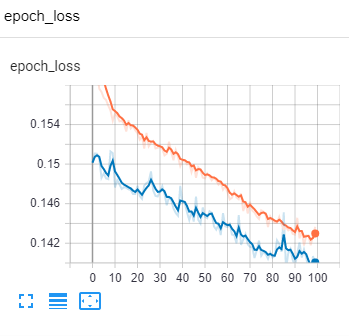

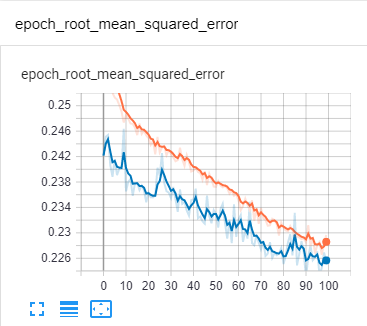

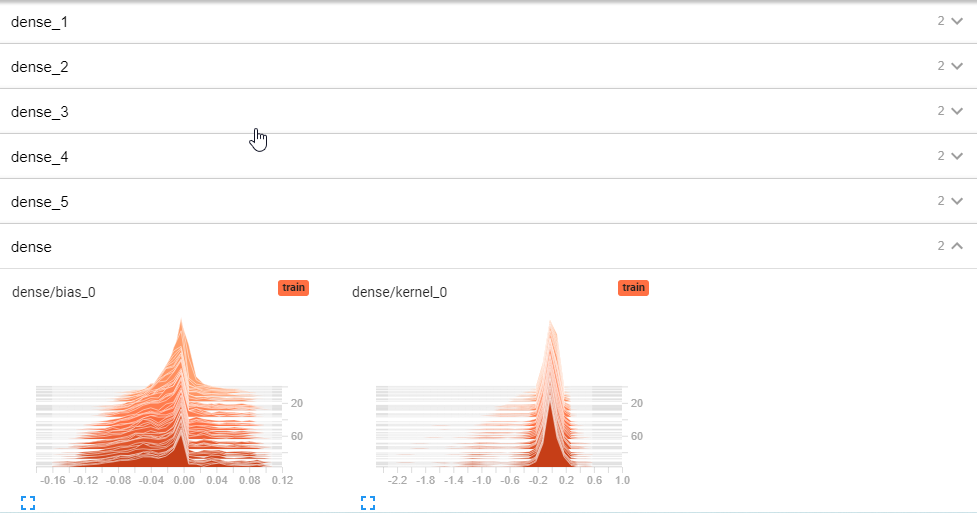

In [ ]:
K.clear_session()

In [ ]:
!zip -r /content/logs_springs.zip /content/logs_springs\\fit\\20210518-115709

  adding: content/logs_springs\fit\20210518-115709/ (stored 0%)
  adding: content/logs_springs\fit\20210518-115709/train/ (stored 0%)
  adding: content/logs_springs\fit\20210518-115709/train/events.out.tfevents.1621339069.c392faa7ba72.60.106091.v2 (deflated 88%)
  adding: content/logs_springs\fit\20210518-115709/train/events.out.tfevents.1621339070.c392faa7ba72.profile-empty (deflated 5%)
  adding: content/logs_springs\fit\20210518-115709/train/plugins/ (stored 0%)
  adding: content/logs_springs\fit\20210518-115709/train/plugins/profile/ (stored 0%)
  adding: content/logs_springs\fit\20210518-115709/train/plugins/profile/2021_05_18_11_57_50/ (stored 0%)
  adding: content/logs_springs\fit\20210518-115709/train/plugins/profile/2021_05_18_11_57_50/c392faa7ba72.tensorflow_stats.pb (deflated 73%)
  adding: content/logs_springs\fit\20210518-115709/train/plugins/profile/2021_05_18_11_57_50/c392faa7ba72.input_pipeline.pb (deflated 57%)
  adding: content/logs_springs\fit\20210518-115709/train/p

In [ ]:
!zip -r /content/model_springs.zip /content/model_springs_save/

  adding: content/model_springs_save/ (stored 0%)
  adding: content/model_springs_save/weights.h5 (deflated 36%)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(1498, 1)

In [ ]:
# find median absolute error
median_absolute_error(y_test,y_pred)

0.1378374286099205

In [ ]:
# find root mean square log error
np.sqrt(mean_squared_log_error(y_test,y_pred))

0.14250678100449088

In [ ]:
# find r2 score
r2_score(y_test,y_pred)

0.14410067815385863

# Summary

In [ ]:
from prettytable import PrettyTable

In [ ]:
# Table for summarizing water body type and their R2 score with different models
finalTable = PrettyTable(["Model","Aquifers", "Lakes", "Rivers", "Springs"])
  
# Add rows
finalTable.add_row(["knn", "0.96", "-17.851,-1.254", "-5.839", "-0.147"])
finalTable.add_row(["Linear Regression", "-0.361", "-156.95,-0.821", "-11.11", "-2.141"])
finalTable.add_row(["Random Forest", "0.966", "-25.89,-0.684", "-9.331", "0.355"])
finalTable.add_row(["SGRegression", "-0.171", "-0.781", "-11.21", "-1.11"])
finalTable.add_row(["Decision Tree", "0.956", "-0.091", "-7.012", "0.211"])
finalTable.add_row(["XGBoost", "0.958", "-0.325", "-11.698", "0.348"])
finalTable.add_row(["AdaBoost", "0.964", "-0.053", "-4.11", "0.309"])
finalTable.add_row(["MLP", "0.958","0.076", "0.106", "0.181"])
  
print(finalTable)

+-------------------+----------+----------------+---------+---------+
|       Model       | Aquifers |     Lakes      |  Rivers | Springs |
+-------------------+----------+----------------+---------+---------+
|        knn        |   0.96   | -17.851,-1.254 |  -5.839 |  -0.147 |
| Linear Regression |  -0.361  | -156.95,-0.821 |  -11.11 |  -2.141 |
|   Random Forest   |  0.966   | -25.89,-0.684  |  -9.331 |  0.355  |
|    SGRegression   |  -0.171  |     -0.781     |  -11.21 |  -1.11  |
|   Decision Tree   |  0.956   |     -0.091     |  -7.012 |  0.211  |
|      XGBoost      |  0.958   |     -0.325     | -11.698 |  0.348  |
|      AdaBoost     |  0.964   |     -0.053     |  -4.11  |  0.309  |
|        MLP        |  0.958   |     0.076      |  0.106  |  0.181  |
+-------------------+----------+----------------+---------+---------+
